## 随机梯度下降法

![jupyter](./随机梯度下降法.png)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
m = 200000

x = np.random.normal(size=m)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

x = x.reshape(-1, 1) # 向量变为矩阵， 方便适应多元情况

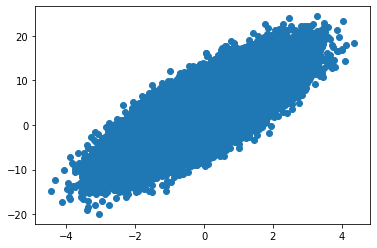

In [3]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [4]:
def f(theta, x_b, y):
    try:
        return np.sum((y - x_b.dot(theta))**2)/len(y)
    except:
        return float('inf')

def df(theta, x_b, y):
    return x_b.T.dot(x_b.dot(theta) - y)*2/len(y)

In [5]:
def gradient_descent(x_b, y, init_theta, eta, max_iter = 1e4, epsilon = 1e-8):
    theta = init_theta
    cur_iter = 0
    
    while cur_iter < max_iter:
        gradient = df(theta, x_b, y)
        last_theta = theta
        theta = theta - gradient * eta
        if (np.abs(f(theta, x_b, y) - f(last_theta, x_b, y)) < epsilon):
            break
        
        cur_iter += 1
    
    return theta

In [6]:
%%time
x_b = np.hstack([np.ones((len(x), 1)), x])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01
theta = gradient_descent(x_b, y, initial_theta, eta)

Wall time: 6.39 s


In [7]:
theta

array([3.00835113, 4.00802883])

## 随机梯度下降法

In [8]:
def df_sgd(theta, x_b_i, y_i):
    return 2*x_b_i.T.dot(x_b_i.dot(theta) - y_i) 

In [9]:
def sgd(x_b, y, init_theta, max_iter = 1e4):
    t0, t1 = 5, 50
    def learn_rate(iter_i):
        return t0 /(iter_i + t1)
    
    theta = init_theta
    for cur_iter in range(max_iter):
        eta = learn_rate(cur_iter)
        rand = np.random.randint(x_b.shape[0])
        gradient = df_sgd(theta, x_b[rand, :], y[rand])
        theta = theta - gradient*eta
    
    return theta

In [75]:
%%time
x_b = np.hstack([np.ones((len(x), 1)), x])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01
theta = sgd(x_b, y, initial_theta, 10000)
theta

Wall time: 251 ms


array([2.96034311, 3.97306122])

In [11]:
theta

array([3.037673  , 4.00749728])